## Urban air pollution project


### TOC (table of content)
1. [Load packages](#loading_packages)
2. [Load data](#loading_data)
3. [EDA technical](#technical_eda)
4. [Hypothesis](#hypothesis)

5. [Feature engineering](#feature_engineering)


<a id='loading_packages'/>

Loading packages

In [357]:
import pandas as pd
import numpy as np

from time import time

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
# from sklearn.inspection import plot_partial_dependence

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# bin numerical data, scale data, encode data
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
# Import functions from own Python-File (see visuals_script.py in Repo)
#import visuals_script as vs
from sklearn.decomposition import PCA
from scipy import stats

from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
import numpy as np

from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
# Pretty display for notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
RSEED=42


## TOC
### Import data

<a id='loading_data'/>

Loading Data

In [387]:
df = pd.read_csv('data/Train.csv')

<a id='technical_eda'/>

EDA Technical

In [3]:
pd.set_option('display.max_rows',None)
df.columns


Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [4]:
df.shape

(30557, 82)

In [5]:
df.dtypes

Place_ID X Date                                         object
Date                                                    object
Place_ID                                                object
target                                                 float64
target_min                                             float64
target_max                                             float64
target_variance                                        float64
target_count                                             int64
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 

In [6]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [7]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
target                                                     0
target_min                                                 0
target_max                                                 0
target_variance                                            0
target_count                                               0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol

In [9]:
df.duplicated().value_counts()

False    30557
Name: count, dtype: int64

#### check outliers for target

<Axes: xlabel='target', ylabel='Count'>

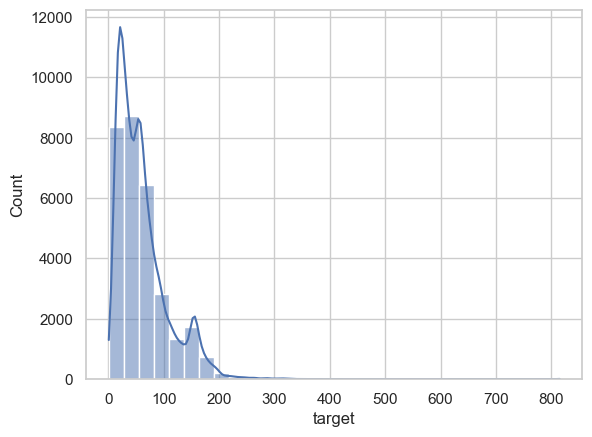

In [10]:
sns.histplot(df, x='target', bins=30, kde=True)

<Axes: >

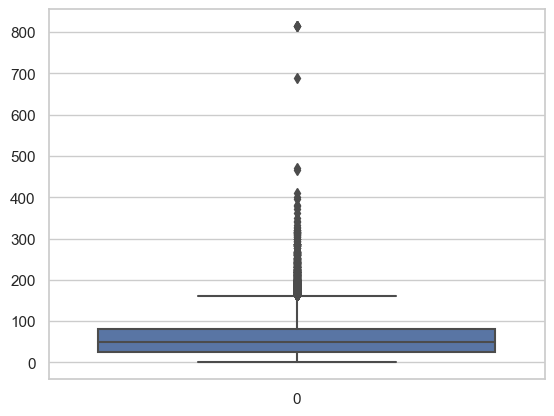

In [11]:
sns.boxplot(df['target'])

we see that the data are exponentially distributed. The box plot shows very high amount of outliers. However, because of the exponential distribution, we can log transfor the target value to reduce the number of 'actual' outliers.

<Axes: >

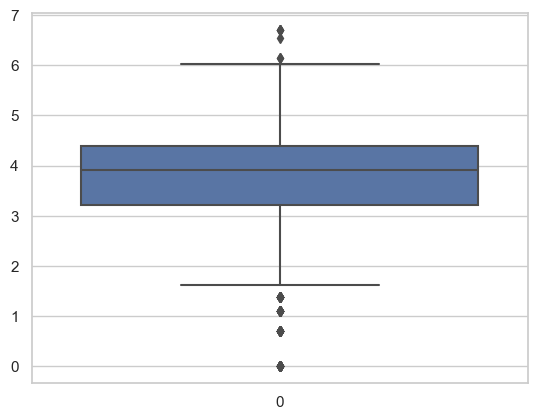

In [12]:
sns.boxplot(df['target'].apply(np.log))

Conclusion is we need to set the treshold: the following code calculates the maximum value for the target that we will use for the training. (this is: we remove the highest seven points).

In [13]:
q1=df['target'].apply(np.log).quantile(0.25)
q3=df['target'].apply(np.log).quantile(0.75)
IQR=q3-q1
max_target = np.exp((q3+1.5*IQR)) 
print(max_target)

457.9467217919567


Hypothsis
<a id='hypothesis'/>

- higher gas column densities, higher target value
- Q: higher wind velocity, lower target value?
    A: true
- humidity correlated non-linearly with target value
- satellite angle correlates with measured column density
- stratospheric column density no correlation with target value
- aerosol index with target value
- AER_AI_sensor_altitude  nega-corr target value

H1: higher gas column densities, higher target value

In [14]:
df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)

target                                                 1.000000
target_min                                             0.818803
target_max                                             0.630801
L3_CO_CO_column_number_density                         0.375737
L3_HCHO_tropospheric_HCHO_column_number_density        0.347125
L3_HCHO_HCHO_slant_column_number_density               0.320849
L3_NO2_NO2_slant_column_number_density                 0.315718
L3_NO2_NO2_column_number_density                       0.306772
L3_NO2_tropospheric_NO2_column_number_density          0.295380
target_variance                                        0.184818
L3_SO2_absorbing_aerosol_index                         0.152000
L3_CLOUD_cloud_top_pressure                            0.123855
L3_CLOUD_cloud_base_pressure                           0.097343
target_count                                           0.094135
L3_CH4_aerosol_optical_depth                           0.086445
L3_CH4_CH4_column_volume_mixing_ratio_dr

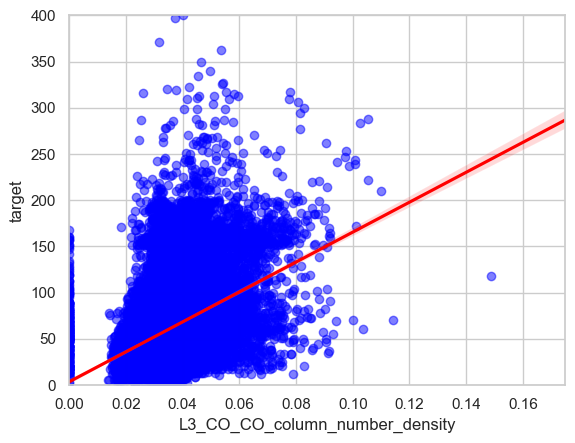

In [15]:
sns.regplot(df, x = 'L3_CO_CO_column_number_density', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )
plt.xlim(0, 0.175)
plt.ylim(0, 400)
plt.show()

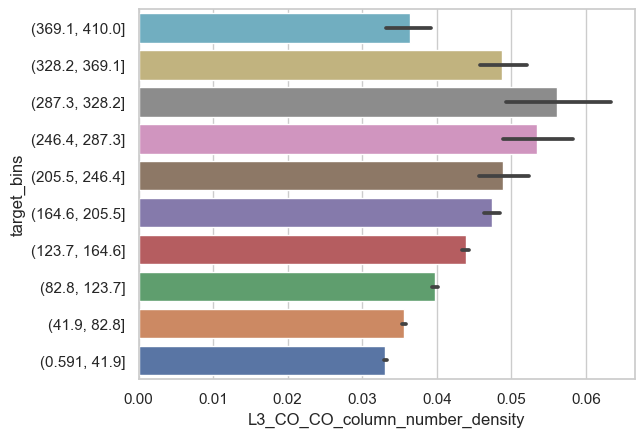

In [16]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CO_CO_column_number_density', y='target_bins').invert_yaxis()

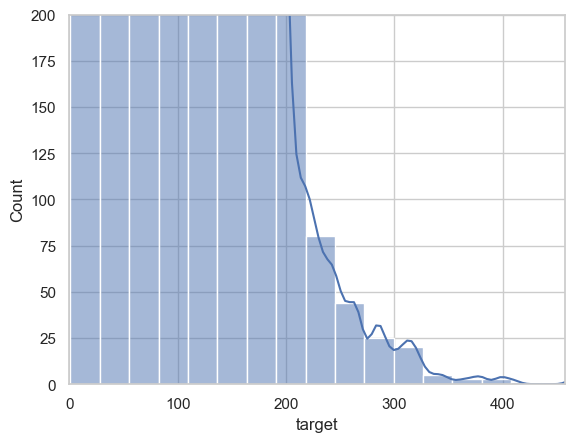

In [34]:
sns.histplot(df, x='target', bins=30, kde=True)
plt.xlim(0, 458)
plt.ylim(0, 200)
plt.show()

- the traget value is increasing until 328.2 with co_column_number_density
- we have less data point above 200 

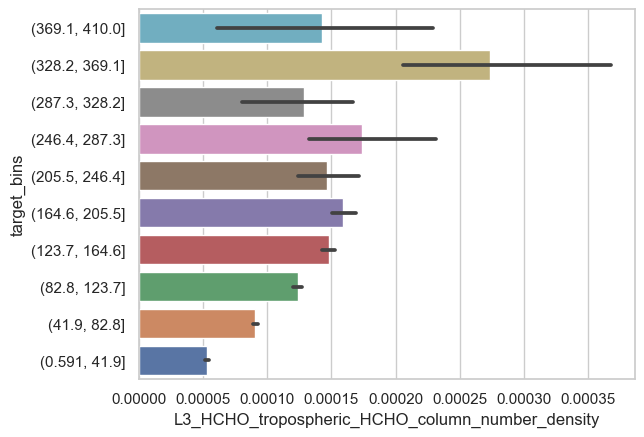

In [24]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_HCHO_tropospheric_HCHO_column_number_density', y='target_bins').invert_yaxis()

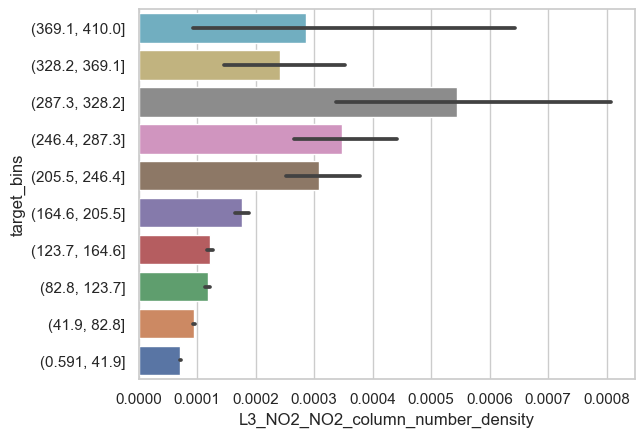

In [26]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_NO2_NO2_column_number_density', y='target_bins').invert_yaxis()

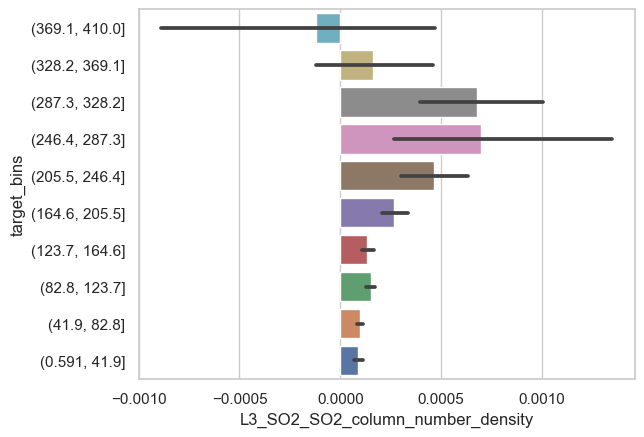

In [27]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_SO2_SO2_column_number_density', y='target_bins').invert_yaxis()

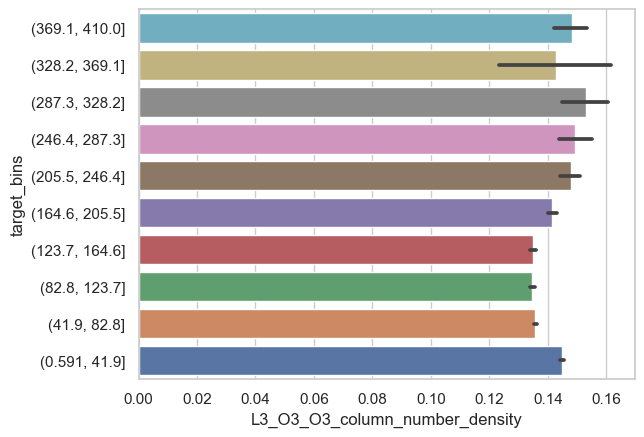

In [28]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_O3_O3_column_number_density', y='target_bins').invert_yaxis()

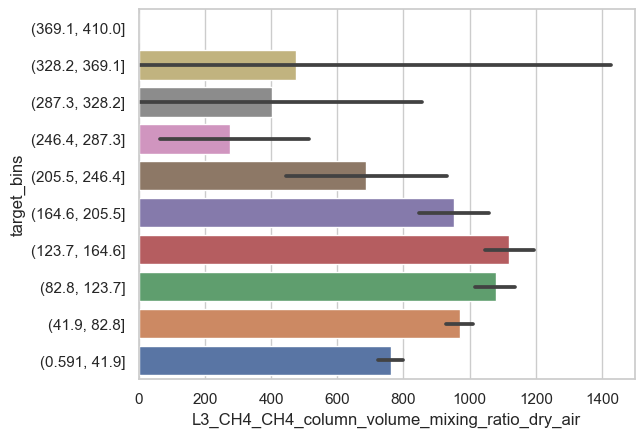

In [32]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CH4_CH4_column_volume_mixing_ratio_dry_air', y='target_bins').invert_yaxis()

Conclusion : H1: higher gas column densities, higher target value: Yes. We look at the data points from 0-200 (afterward it is unreliable)

H2: - Q: higher wind velocity, lower target value?
    A: true

In [17]:
df_abs = df_temp.copy()
df_abs['u_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

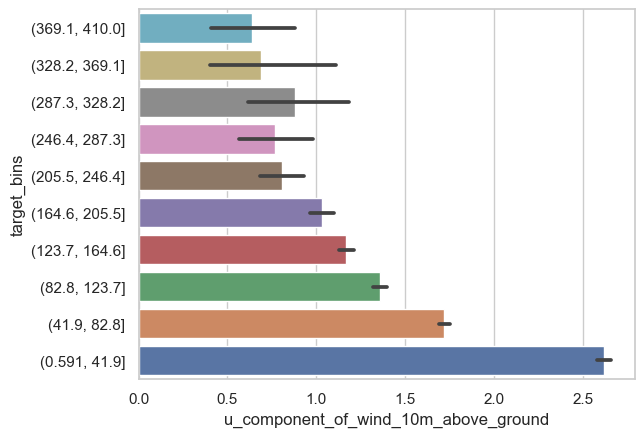

In [18]:
sns.barplot(df_abs, x='u_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

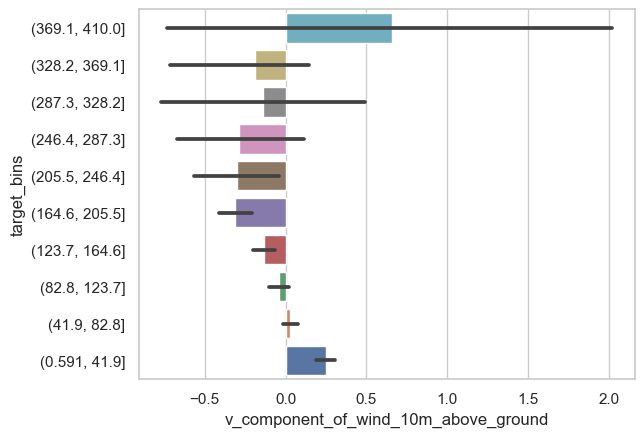

In [39]:
sns.barplot(df_temp, x='v_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

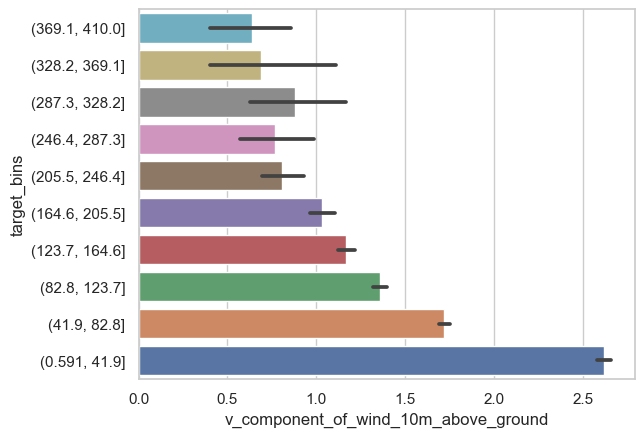

In [36]:
df_abs = df_temp.copy()
df_abs['v_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

sns.barplot(df_abs, x='v_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

The more wind the cleaner the air

H3: - humidity correlated non-linearly with target value

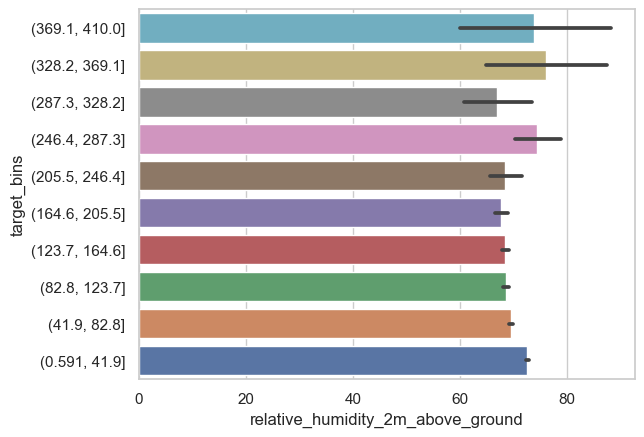

In [61]:
sns.barplot(df_temp, x='relative_humidity_2m_above_ground', y='target_bins').invert_yaxis()
#plt.xlim(60, 100)
#plt.show()

H3
- a small change in humdidity makes a big change in pollution but most humidity values are within each others range (error range), so there is maby no dependency at all


H4: satellite angle correlates with the target value (measured column density)

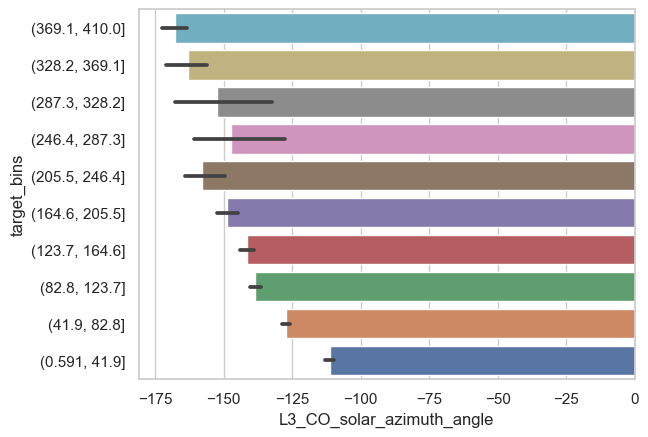

In [40]:
sns.barplot(df_temp, x='L3_CO_solar_azimuth_angle', y='target_bins').invert_yaxis()

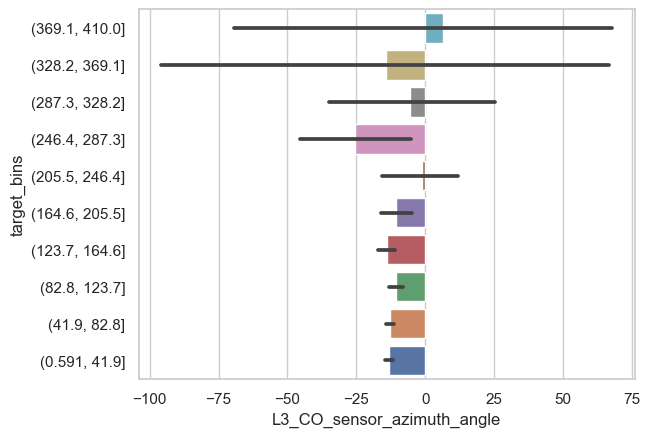

In [42]:
sns.barplot(df_temp, x='L3_CO_sensor_azimuth_angle', y='target_bins').invert_yaxis()


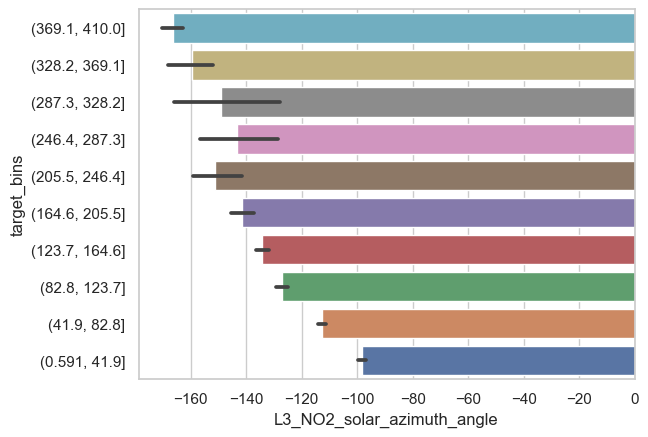

In [41]:
sns.barplot(df_temp, x='L3_NO2_solar_azimuth_angle', y='target_bins').invert_yaxis()

(815000.0, 844553.1211771137)

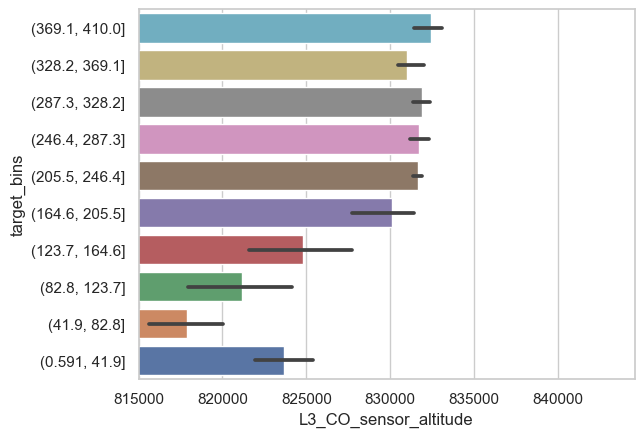

In [47]:
sns.barplot(df_temp, x='L3_CO_sensor_altitude', y='target_bins').invert_yaxis()
plt.xlim(815000, df_temp['L3_CO_sensor_altitude'].max())

- solar_azimuth_angle: The pollution seems to depend on the position of the sun and that means the time of the day (?)
- sensor_azimuth_ angle: The pollution seems not depend on the sensor azimuth angle
- sensor_altitude: there is a a non-linear dependency



H5: stratospheric column density no correlation with target value

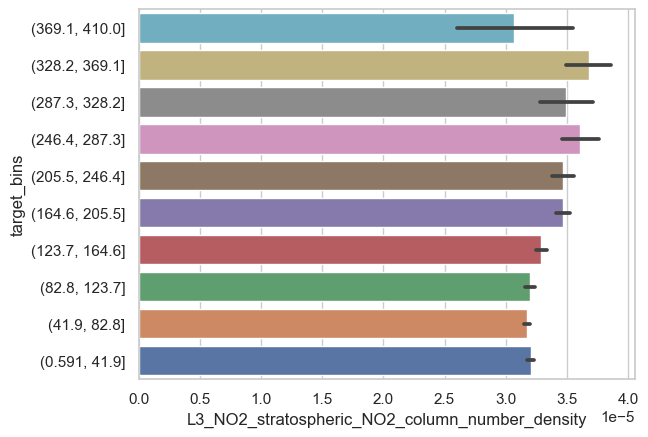

In [48]:
sns.barplot(df_temp, x='L3_NO2_stratospheric_NO2_column_number_density', y='target_bins').invert_yaxis()

- no correlation between target value and stratospheric column density

H6: aerosol index with target value correlation ? 

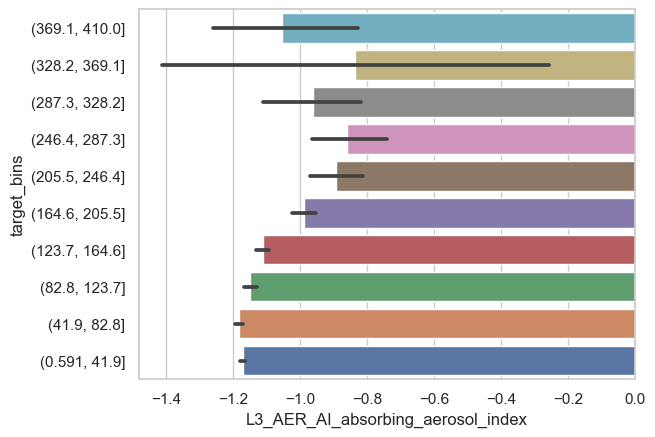

In [49]:
sns.barplot(df_temp, x='L3_AER_AI_absorbing_aerosol_index', y='target_bins').invert_yaxis()

- when negativ values = no absorbing aerosol 
- high negativ values of aresol index represent cleaner air. 


H7: AER_AI_sensor_altitude  nega-corr target value

(815000.0, 844493.8976953975)

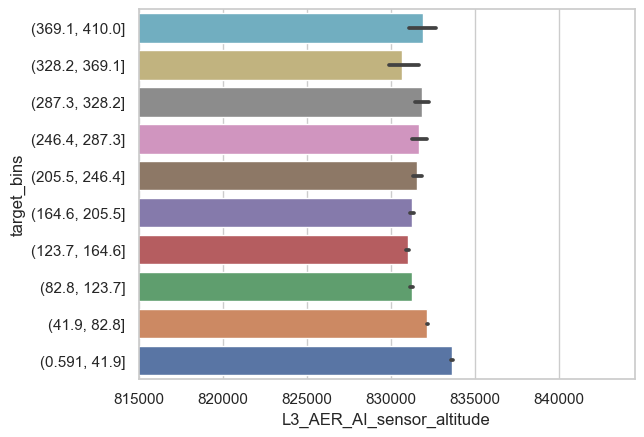

In [52]:
sns.barplot(df_temp, x='L3_AER_AI_sensor_altitude', y='target_bins').invert_yaxis()
plt.xlim(815000, df_temp['L3_AER_AI_sensor_altitude'].max())


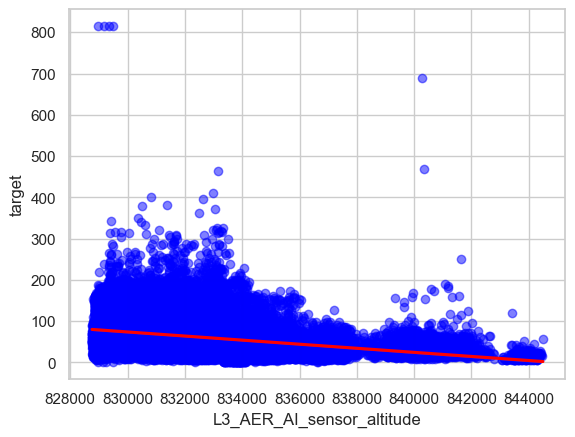

In [57]:
sns.regplot(df, x = 'L3_AER_AI_sensor_altitude', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )

plt.show()

Cloud 

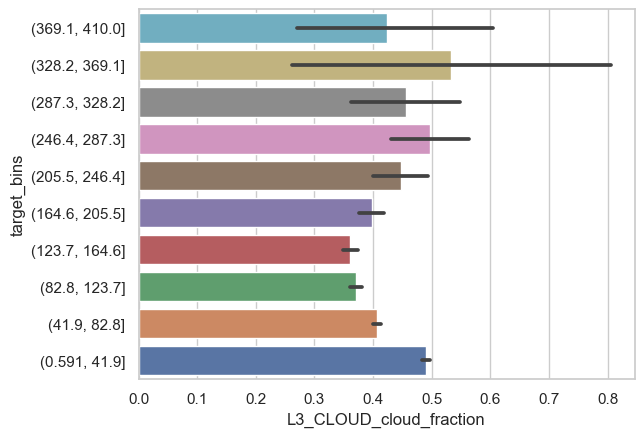

In [59]:
sns.barplot(df_temp, x='L3_CLOUD_cloud_fraction', y='target_bins').invert_yaxis()


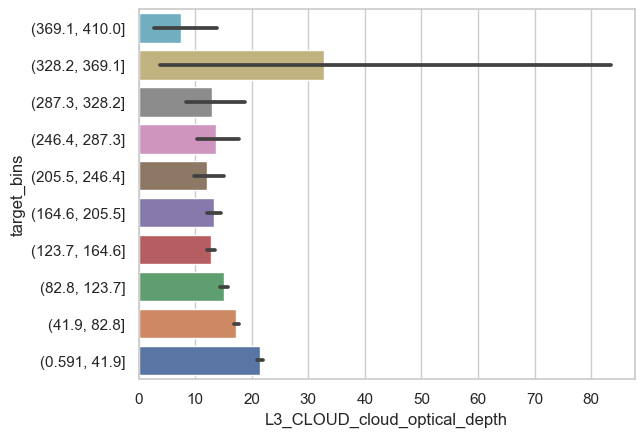

In [60]:
sns.barplot(df_temp, x='L3_CLOUD_cloud_optical_depth', y='target_bins').invert_yaxis()

- the higher could_optical depth the lower the polution


- if we have a lot of clouds we have lower polution 

Summary Results
- polution rises with: 
    - higher gas column number density


- polution decreases with:
    - higher wind velocity
    - later time of day
    - higher negativ absorbing aerosol index
    - higher cloud fraction
    - higher could_optical depth


- unclear relationship between pollution and:
    - humidity
    - sensor azimuth angle
    - sensor altitude 
    - strat. gas column density 
    
    


<Axes: xlabel='Date', ylabel='L3_CO_CO_column_number_density'>

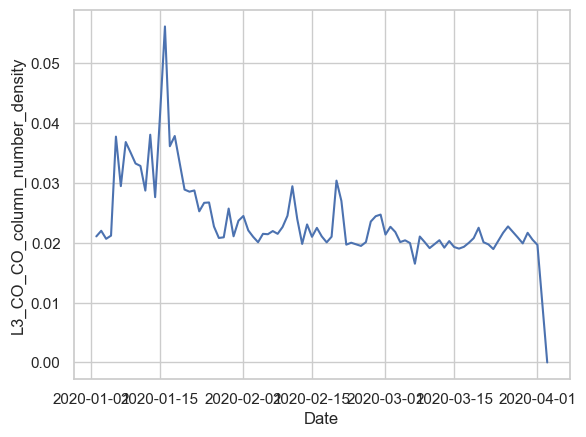

In [22]:
selected_rows = df[df['Place_ID'] == '010Q650']

sns.lineplot(x='Date', y='L3_CO_CO_column_number_density', data=selected_rows)

<Axes: xlabel='Date', ylabel='relative_humidity_2m_above_ground'>

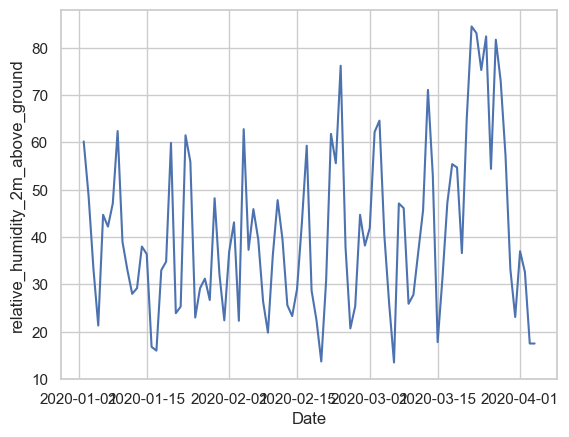

In [23]:
selected_rows = df[df['Place_ID'] == '010Q650']

sns.lineplot(x='Date', y='relative_humidity_2m_above_ground', data=selected_rows)

Date and Target Value

<Axes: xlabel='Date', ylabel='target'>

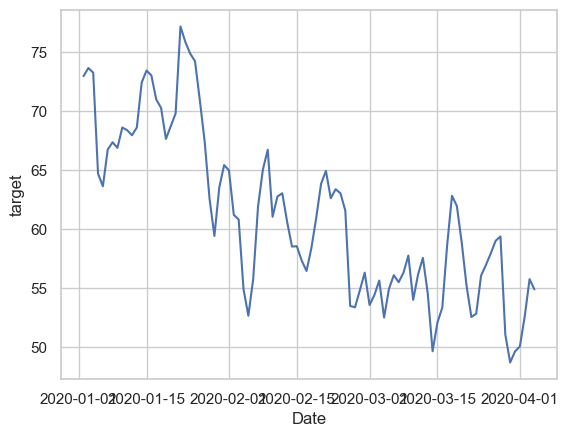

In [87]:
sns.lineplot(df.groupby('Date')['target'].mean().reset_index(), x='Date', y='target')

- we have a decrease in air pollution the later in the year 

Tasks before Modelling 

- Check the rest of the hypothesis
- Explore the missing data 
- Find a good way to  impute the missing data 
- Decide what data to bin or OHE 

Data Cleaning 

In [64]:
df['Date'].isnull().sum()

0

In [65]:
df['Place_ID'].isnull().sum()

0

In [70]:
missing_values = df.isnull().sum()
positive_missing_values = missing_values[missing_values > 0]
print(positive_missing_values)

L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol_index                          2189
L3_NO2_cloud_fraction                                   2189
L3_NO2_sensor_altitude                                  2189
L3_NO2_sensor_azimuth_angle                             2190
L3_NO2_sensor_zenith_angle                              2190
L3_NO2_solar_azimuth_angle                              2190
L3_NO2_solar_zenith_angle                               2190
L3_NO2_stratospheric_NO2_column_number_density          2190
L3_NO2_tropopause_pressure                              2190
L3_NO2_tropospheric_NO2_column_number_density           8669
L3_O3_O3_column_number_density                           283
L3_O3_O3_effective_temperature                           283
L3_O3_cloud_fraction                                     283
L3_O3_sensor_azimuth_angle                               283
L3_O3_sensor_zenith_angl

In [74]:
total_missing_values = df.isnull().sum().sum()
total_elements = df.size

missing_percentage_total = (total_missing_values / total_elements) * 100
print(missing_percentage_total)

15.495311840247375


In [100]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

positive_missing_percentage = missing_percentage[missing_percentage > 0]
pd.DataFrame(positive_missing_percentage).sort_values(by=0, ascending=False)

,0
L3_CH4_solar_zenith_angle,81.045260
L3_CH4_solar_azimuth_angle,81.045260
L3_CH4_sensor_zenith_angle,81.045260
L3_CH4_sensor_azimuth_angle,81.045260
L3_CH4_aerosol_optical_depth,81.045260
L3_CH4_aerosol_height,81.045260
L3_CH4_CH4_column_volume_mixing_ratio_dry_air,81.045260
L3_NO2_tropospheric_NO2_column_number_density,28.369932
L3_HCHO_HCHO_slant_column_number_density,24.298851
L3_HCHO_tropospheric_HCHO_column_number_density,24.298851


In [109]:
humidity_features = [col for col in df.columns if 'humidity' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in relative_humidity_2m_above_ground: 0.00%
Percentage of missing values in specific_humidity_2m_above_ground: 0.00%


In [113]:
humidity_features = [col for col in df.columns if 'sensor_azimuth_angle' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in L3_NO2_sensor_azimuth_angle: 7.17%
Percentage of missing values in L3_O3_sensor_azimuth_angle: 0.93%
Percentage of missing values in L3_CO_sensor_azimuth_angle: 17.75%
Percentage of missing values in L3_HCHO_sensor_azimuth_angle: 24.30%
Percentage of missing values in L3_CLOUD_sensor_azimuth_angle: 1.22%
Percentage of missing values in L3_AER_AI_sensor_azimuth_angle: 0.64%
Percentage of missing values in L3_SO2_sensor_azimuth_angle: 23.68%
Percentage of missing values in L3_CH4_sensor_azimuth_angle: 81.05%


In [115]:
humidity_features = [col for col in df.columns if 'sensor_altitude' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in L3_NO2_sensor_altitude: 7.16%
Percentage of missing values in L3_CO_sensor_altitude: 17.75%
Percentage of missing values in L3_AER_AI_sensor_altitude: 0.64%


In [164]:
all_features = list(df.columns)

# Features to be removed
features_to_remove = [feature for feature in all_features if "CH4" in feature or "stratospheric" in feature or "target" in feature or "sensor_azimuth_angle" in feature or "tropopause" in feature]

# Creating a new list without the specified features
new_features = [feature for feature in all_features if feature not in features_to_remove]
len(new_features)

61

In [85]:
miss = df.groupby('Place_ID')['L3_CO_CO_column_number_density'].apply(lambda x: x.isna().sum())


In [84]:
count = df.groupby('Place_ID')['Date'].count()


In [86]:
percent = (miss/count)*100
percent

Place_ID
010Q650     7.446809
05EC30X     8.888889
0DPWHX8    10.638298
0GBXTHY    53.191489
0HYPV1N     4.255319
0I2XREH    15.384615
0KV6RJ1    24.468085
0MGEY68    21.276596
0O9R6AD     2.173913
0PP73FZ    61.702128
0RYZQUU     8.791209
0TFOCOS    12.903226
0TLH9UN    41.489362
11WPGRD     9.574468
168B2T2     5.319149
1GZGJPN    15.957447
1LC5FAK    23.404255
1PRBF5P    11.702128
1RYCZPT    44.680851
1SC5AWD     2.127660
1SKLTGJ    17.204301
1TE1HKJ    21.518987
1UEYEJQ    28.571429
1VN0K1S    18.292683
1WD100Y     2.127660
1X421B8     0.000000
1Y0S7TZ     8.163265
1YXF6T3     9.782609
1Z0FIHB    27.659574
1ZBVIMD    26.373626
215BUAP    14.893617
22D7H7I     9.782609
238N4KU    12.765957
28OSFYU    10.638298
2JZW8ZM    23.404255
2OR3E6X    12.765957
2S8UY1N    14.893617
2T41T7C    18.085106
2USU80I    20.212766
2WABRKJ    19.148936
35YN53B    20.212766
37VXILV    46.808511
3EJ33BJ    16.129032
3H1DEPM     4.255319
3HTVI1M    14.893617
3MXSVYJ     9.090909
3V177MC    18.085106
3WZQ

In [158]:
new_features

['Place_ID X Date',
 'Date',
 'Place_ID',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_a

In [159]:
new_features

['Place_ID X Date',
 'Date',
 'Place_ID',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_a

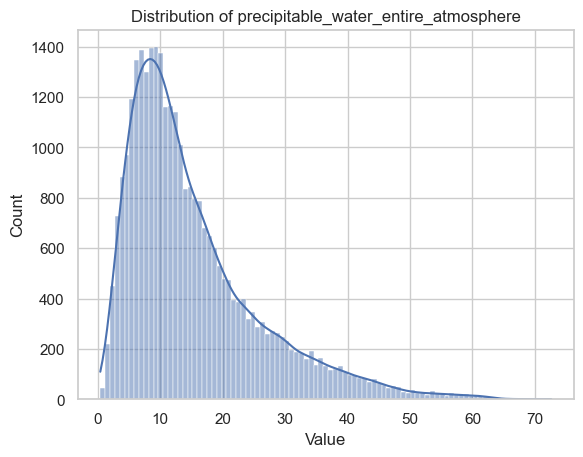

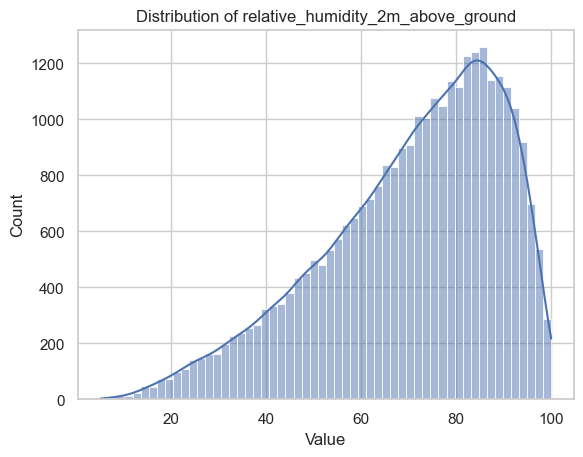

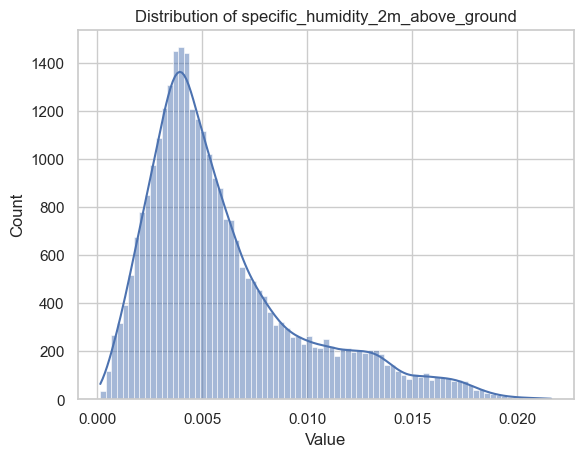

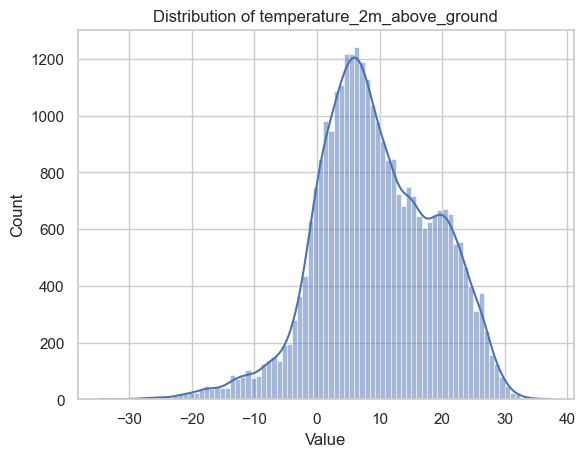

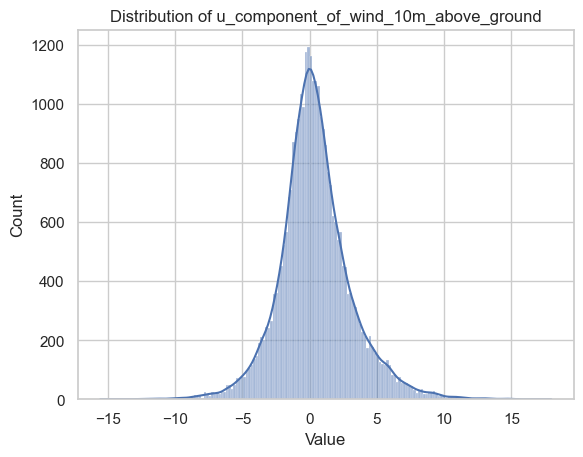

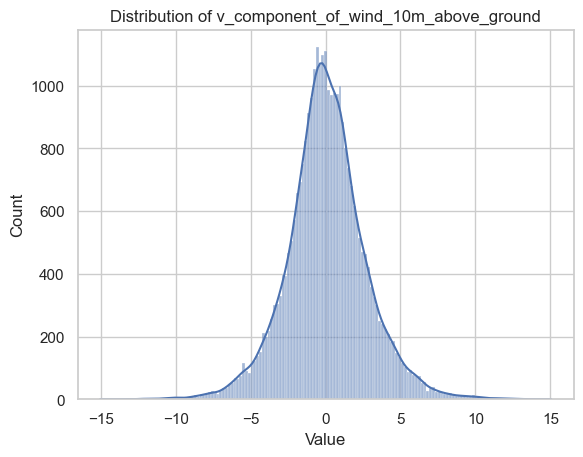

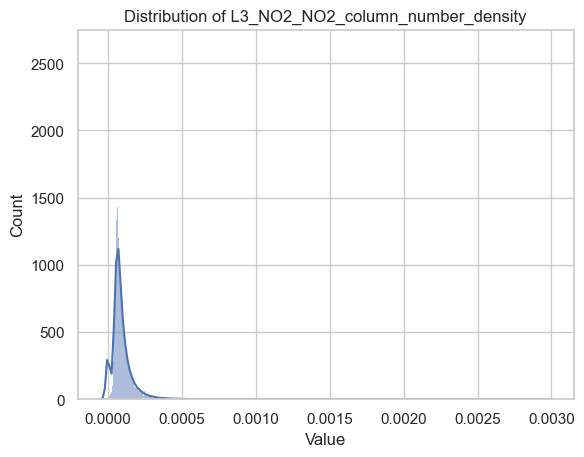

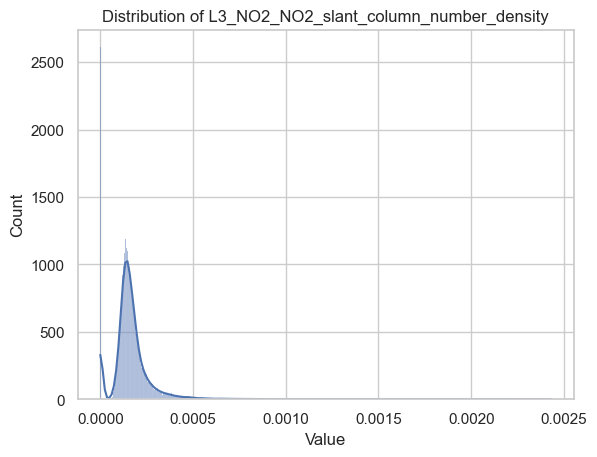

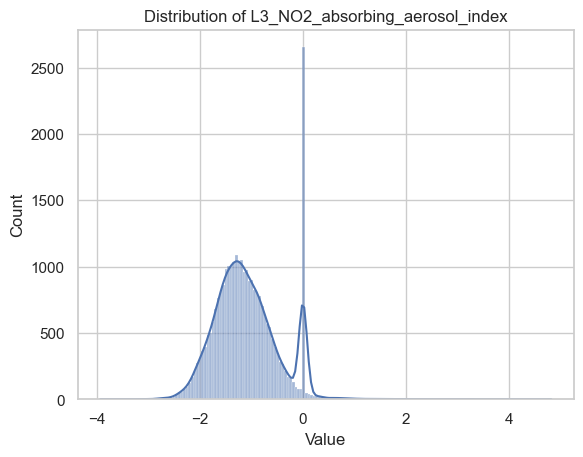

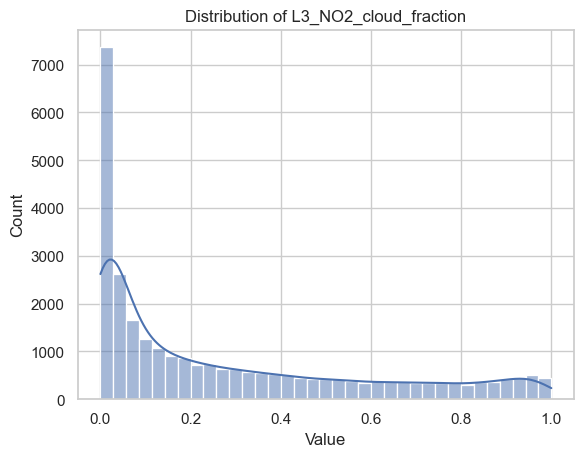

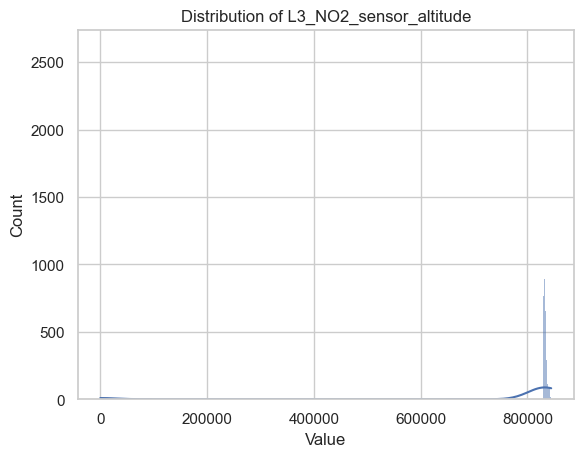

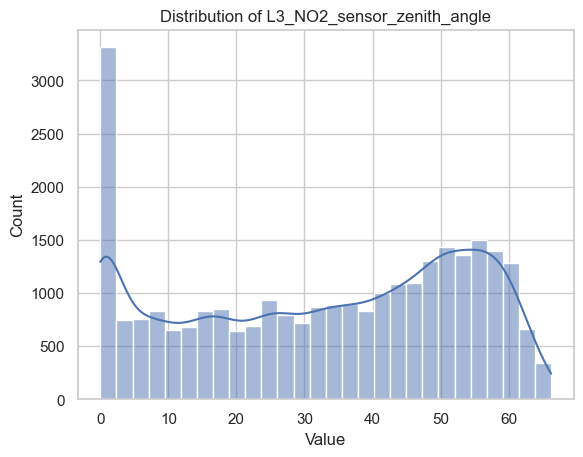

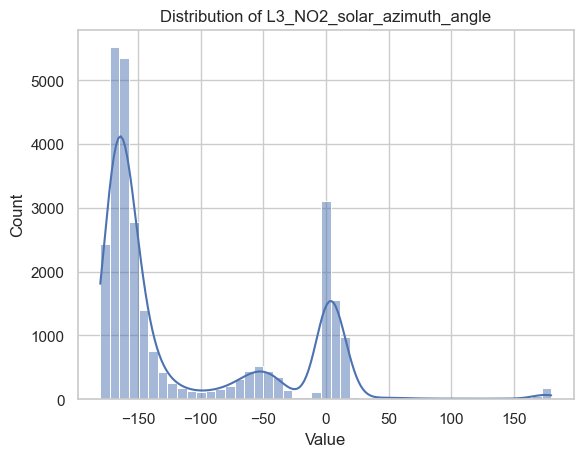

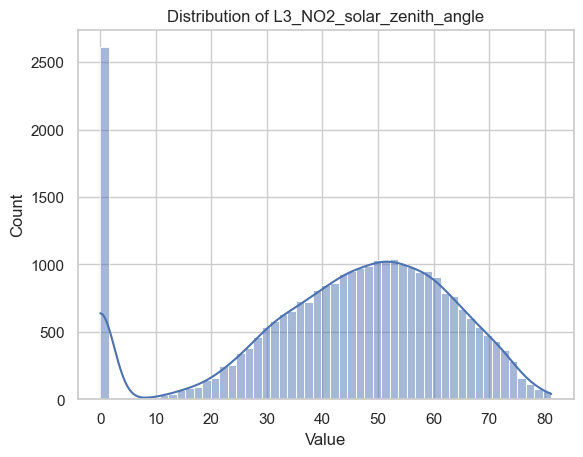

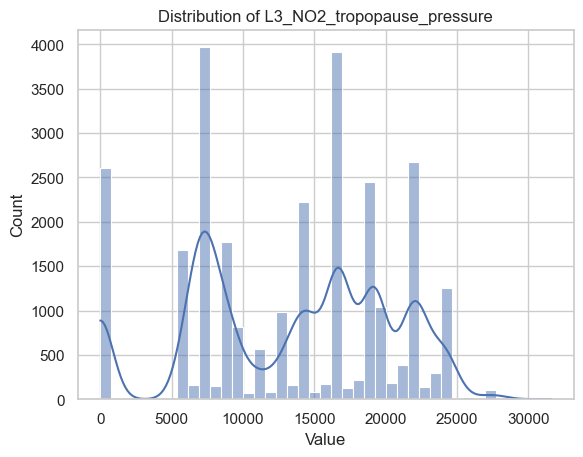

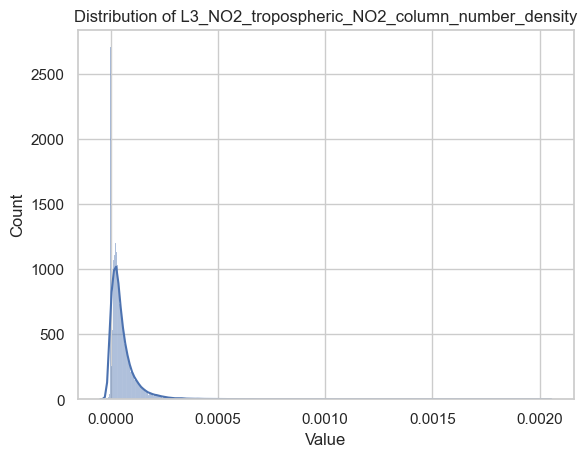

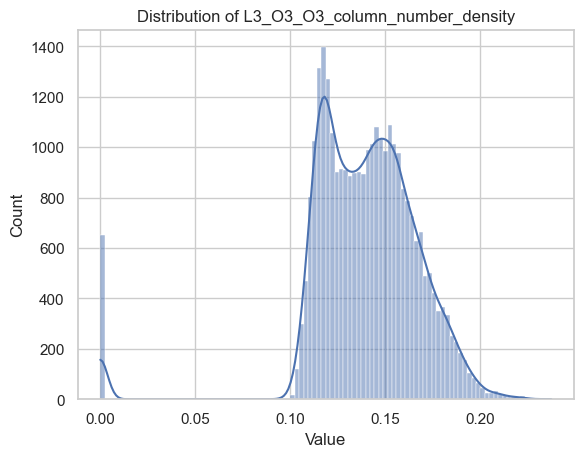

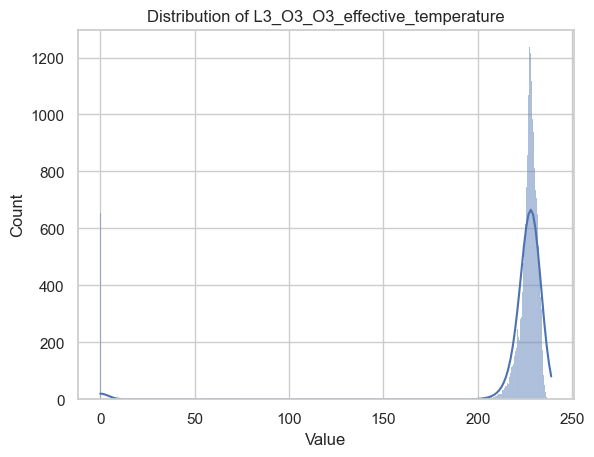

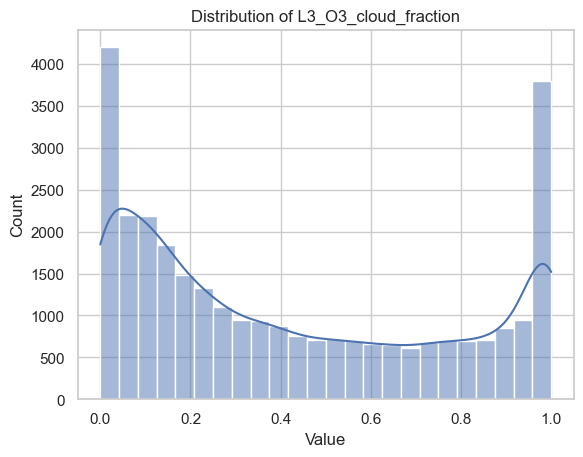

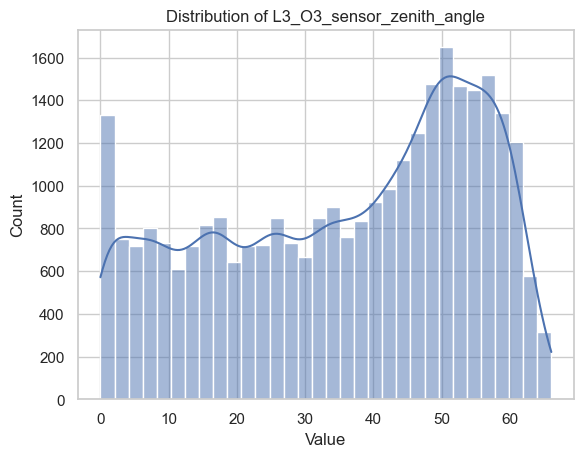

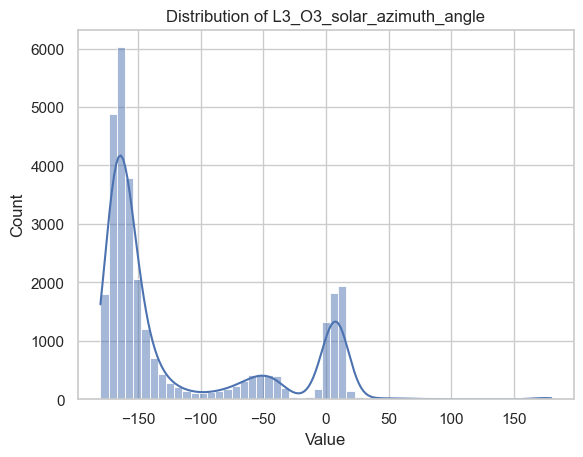

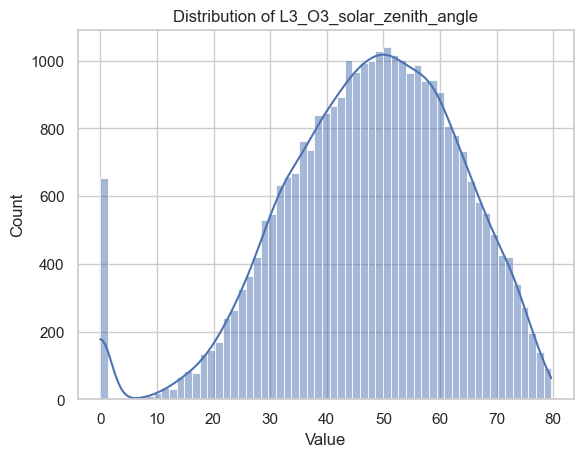

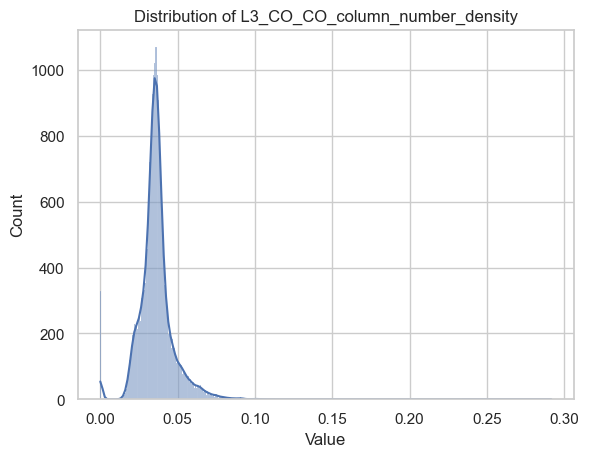

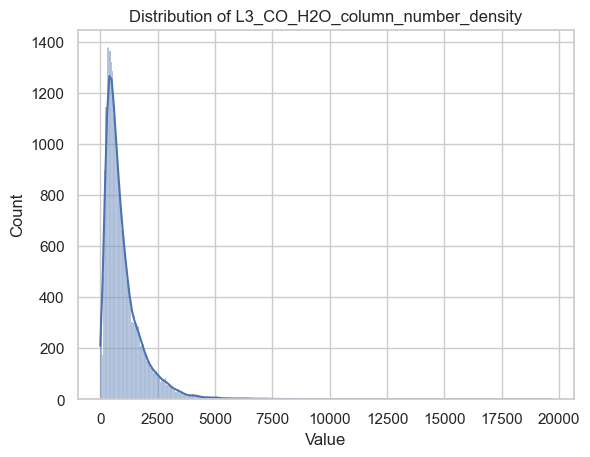

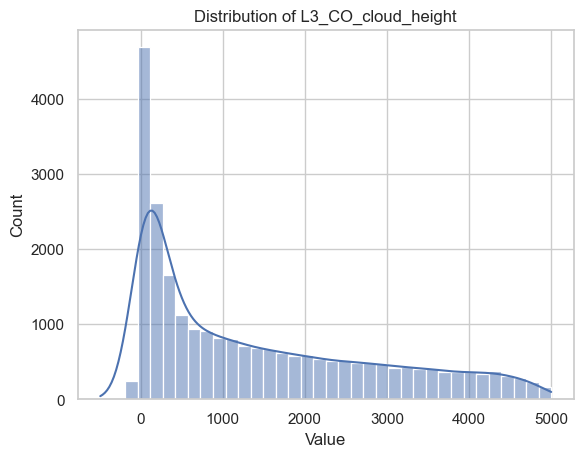

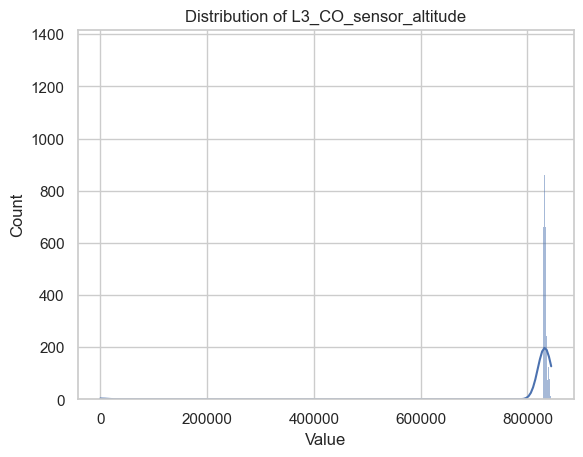

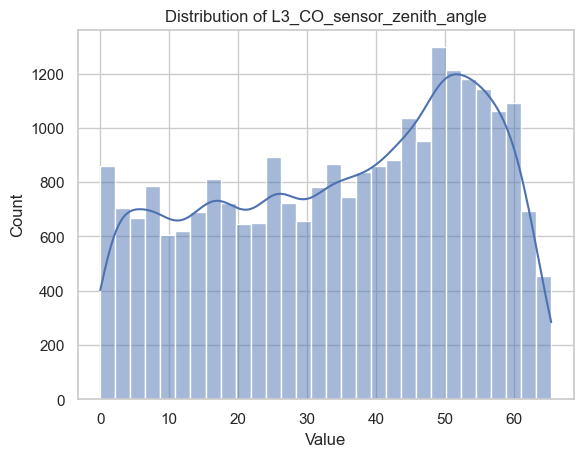

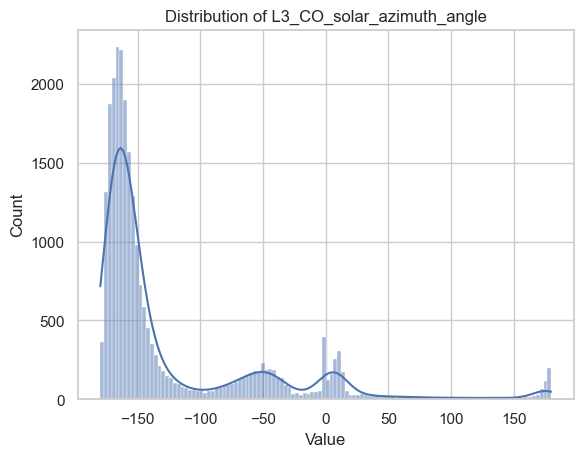

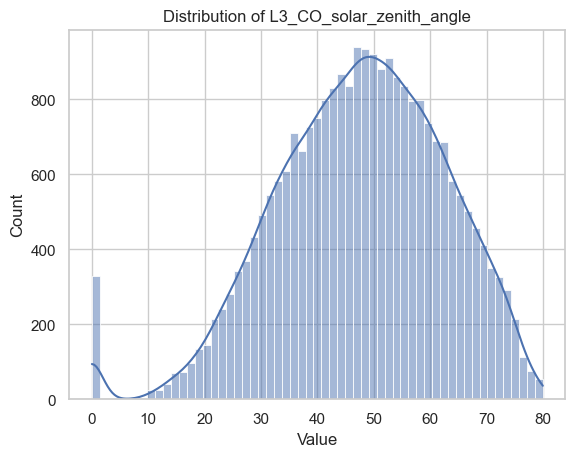

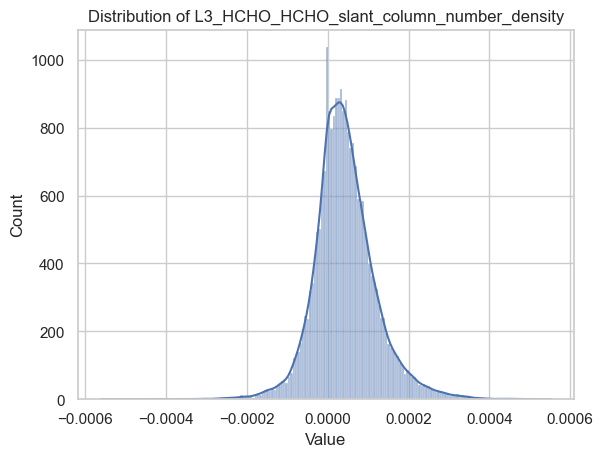

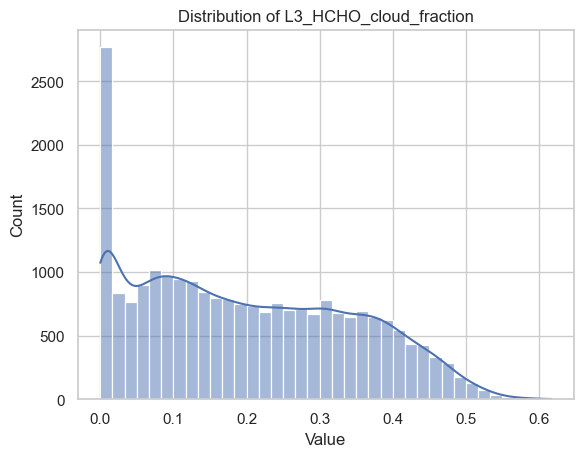

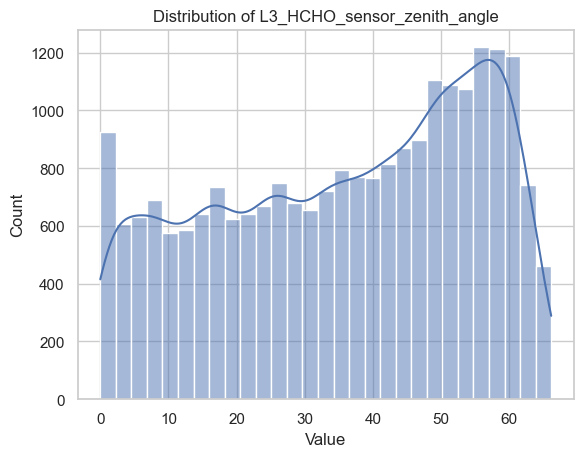

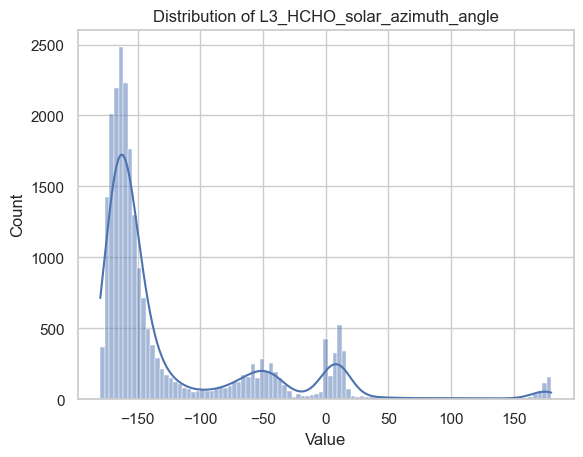

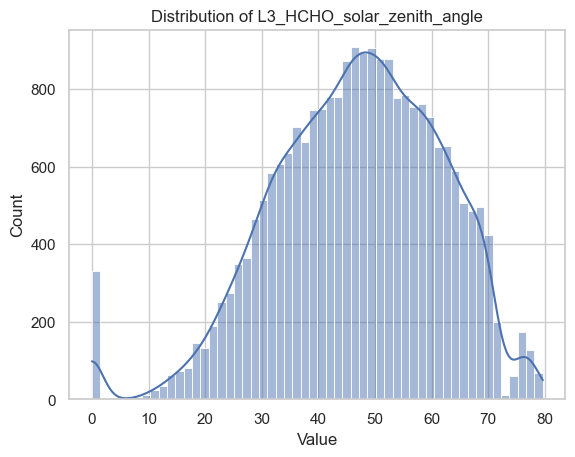

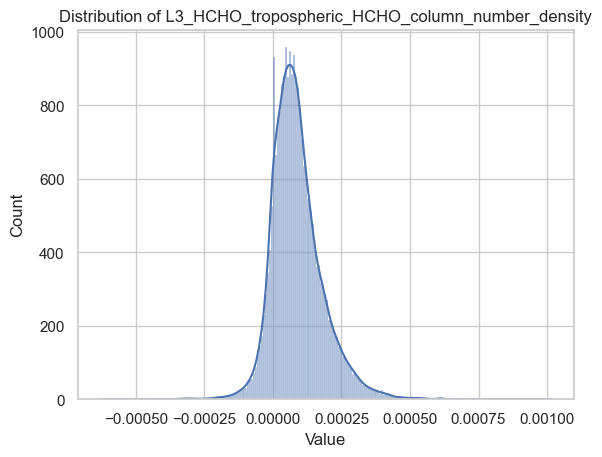

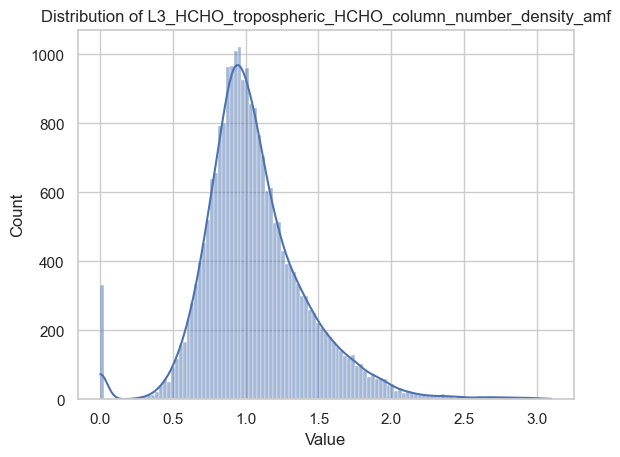

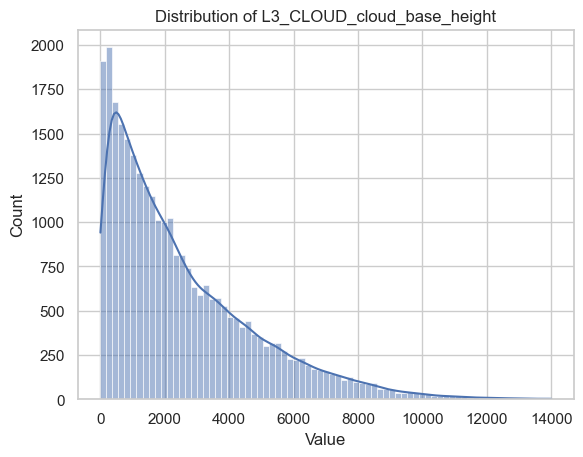

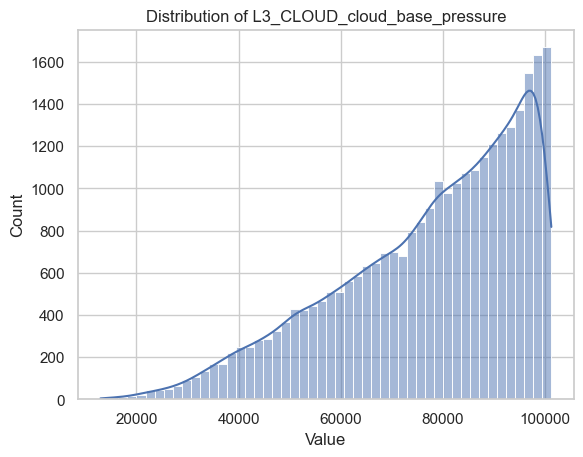

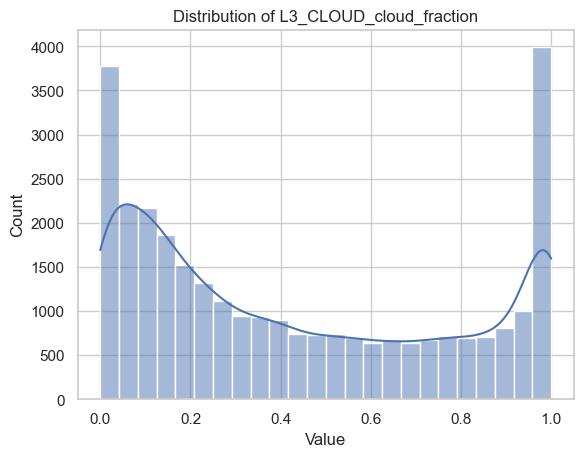

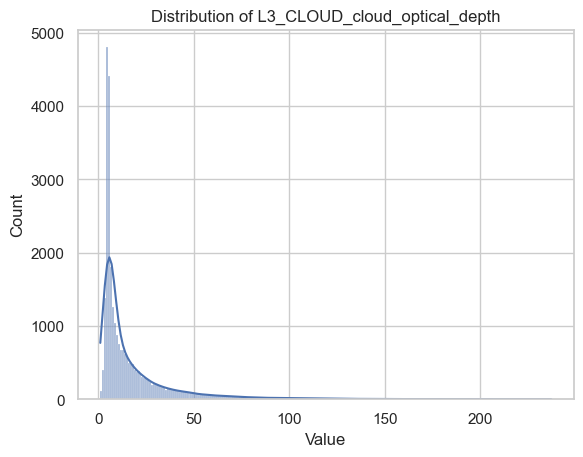

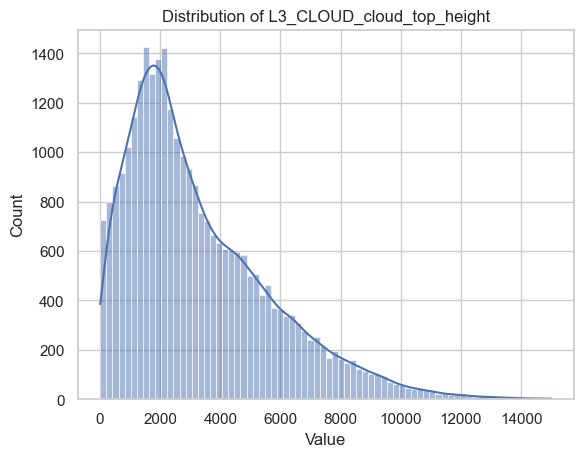

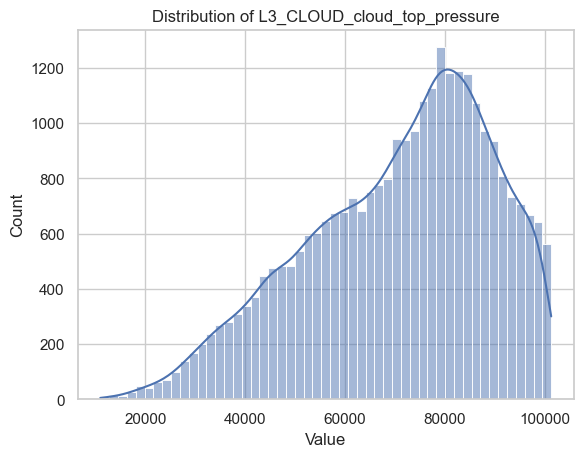

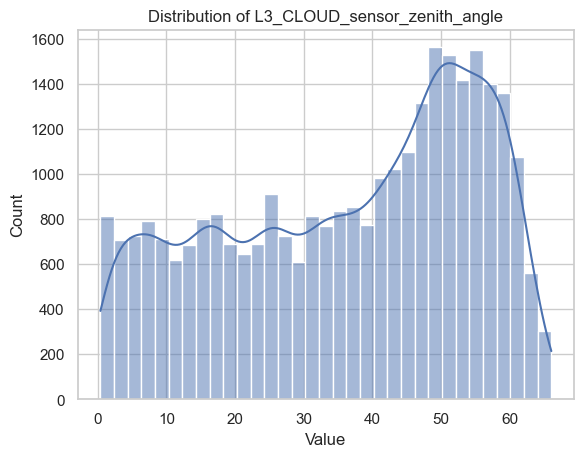

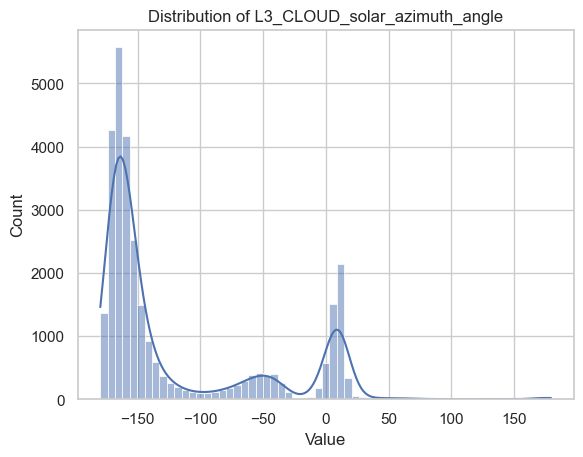

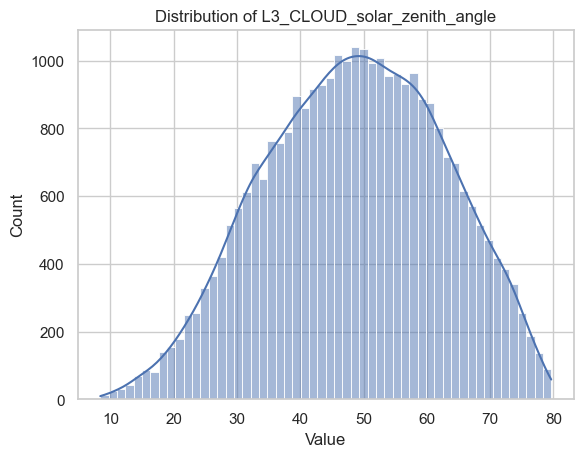

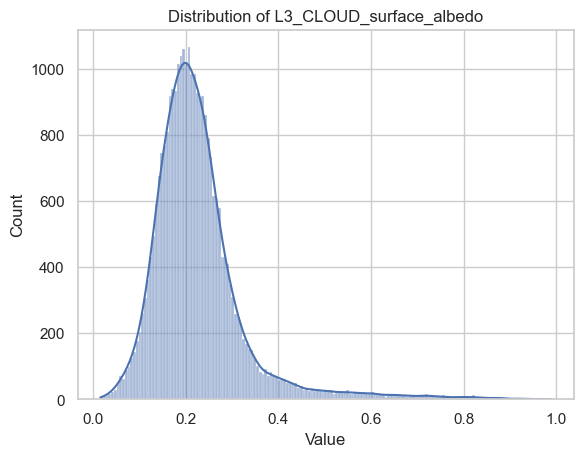

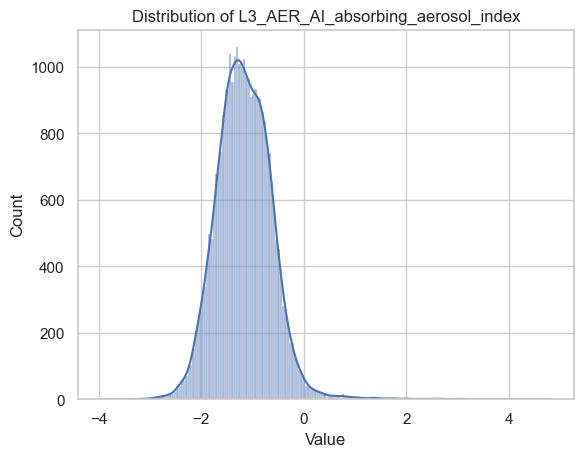

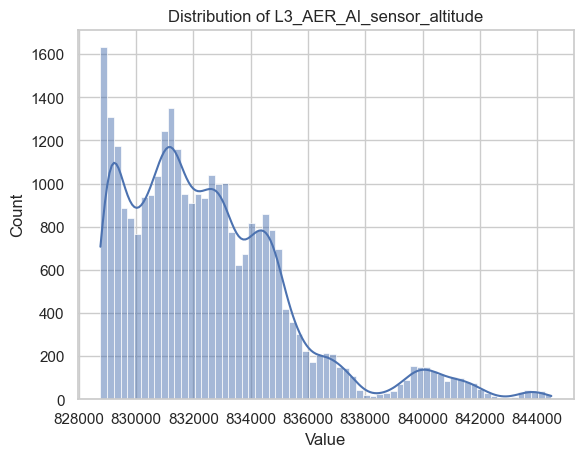

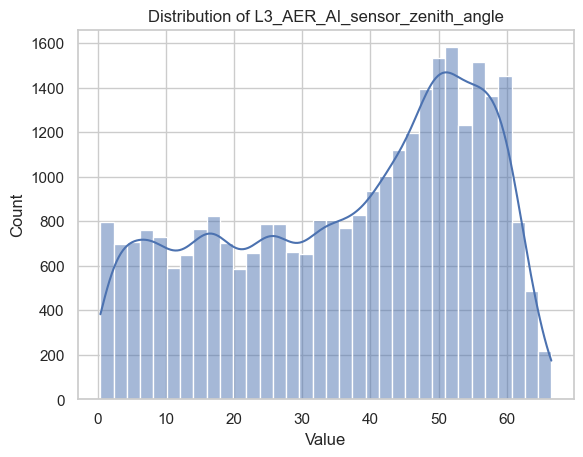

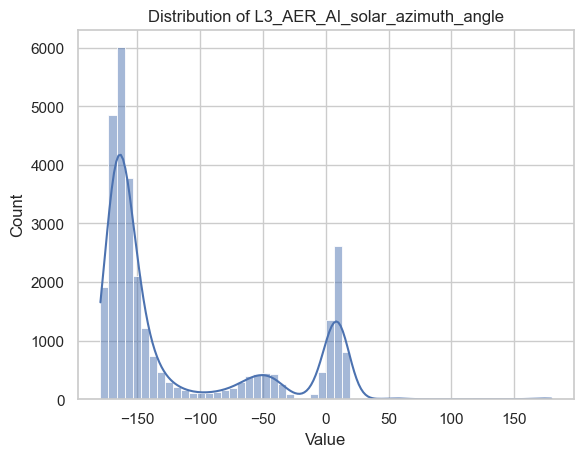

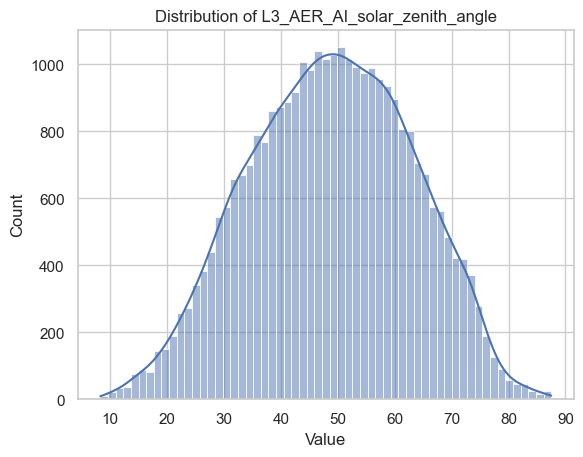

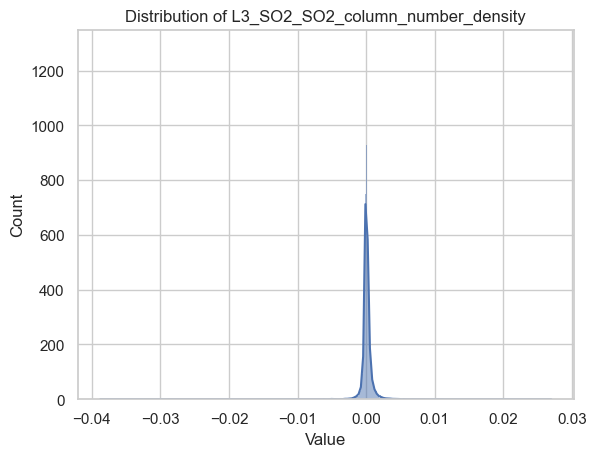

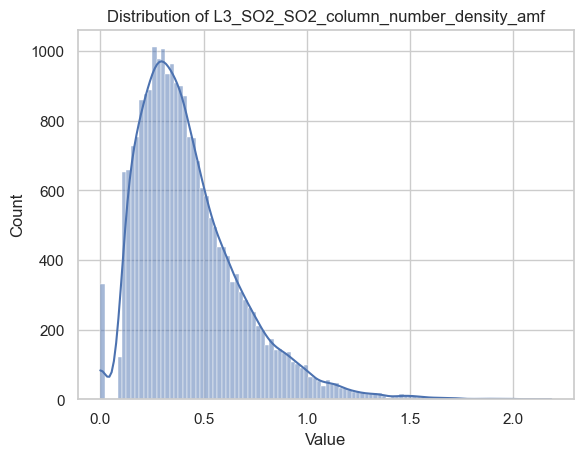

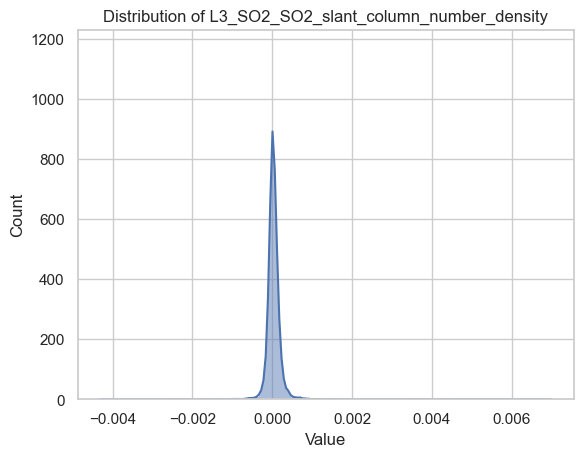

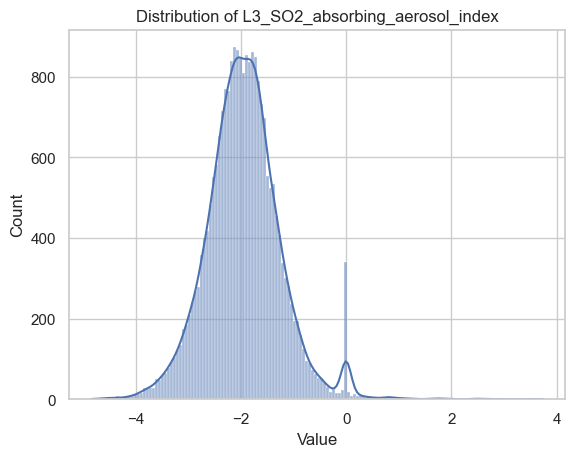

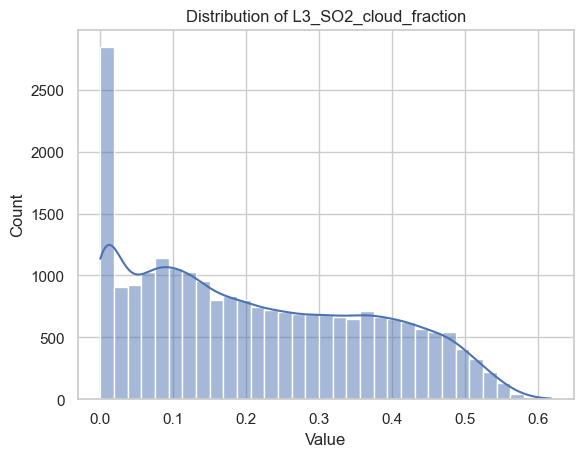

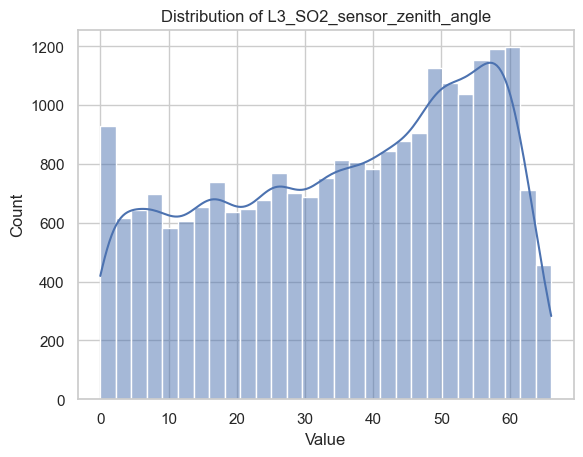

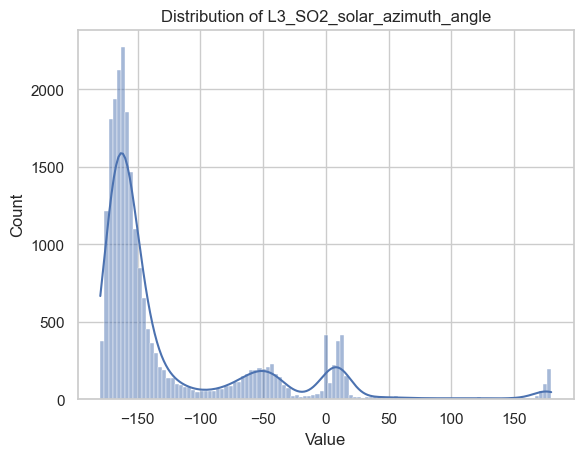

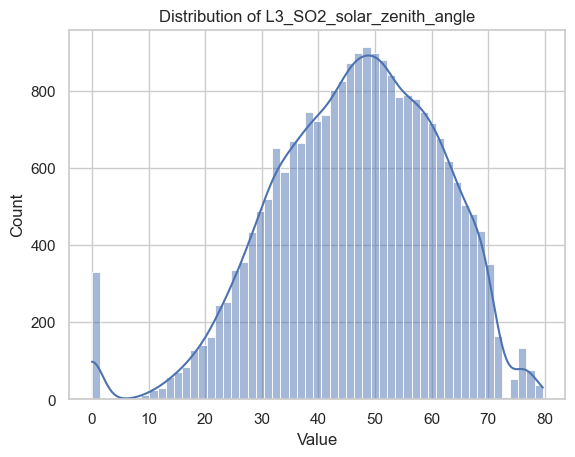

In [163]:

numeric_features = df[new_features].select_dtypes(include=['number'])
sns.set(style="whitegrid")
# Create histograms for each numeric feature
for feature in numeric_features.columns:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data=df[new_features], x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
# Show all the histograms
plt.show()



What do want to do
Outliers need to be cutted, 0 in some columns to be changed as NaN 
['Place_ID X Date',
 'Date',
 'Place_ID',
 'target',
 'target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere', no missing value, Standard Scaler
 'relative_humidity_2m_above_ground', no missing value, Standard Scaler
 'specific_humidity_2m_above_ground', no missing value, Standard Scaler
 'temperature_2m_above_ground', no missing value, Standard Scaler
 'u_component_of_wind_10m_above_ground',  no missing value, Standard Scaler (try model with abs value maybe?)
 'v_component_of_wind_10m_above_ground', no missing value, Standard Scaler
 'L3_NO2_NO2_column_number_density', outliers, missing values, impute KNN(if feature setting possible), Standard Scaler
 'L3_NO2_NO2_slant_column_number_density', outliers, missing values, impute KNN(if feature setting possible), Standard Scaler
 'L3_NO2_absorbing_aerosol_index', missing values, impute KNN(if feature setting possible), Standard Scaler
 'L3_NO2_cloud_fraction', missing values, impute KNN(if feature setting possible)
 'L3_NO2_sensor_azimuth_angle', impute and Standard Scaler
 'L3_NO2_sensor_zenith_angle', KNNimpute and Min-Max-Scaler
 'L3_NO2_solar_azimuth_angle', KNNimpute and Standard Scaler
 'L3_NO2_solar_zenith_angle', KNNimpute and Standard Scaler
 'L3_NO2_stratospheric_NO2_column_number_density', *not included
 'L3_NO2_tropopause_pressure', * not included
 'L3_NO2_tropospheric_NO2_column_number_density', KNNimpute and Standard Scaler
 'L3_O3_O3_column_number_density',KNNimpute and Standard Scaler
 'L3_O3_O3_effective_temperature',KNNimpute and Standard Scaler
 'L3_O3_cloud_fraction', KNN impute
 'L3_O3_sensor_azimuth_angle',* not included
 'L3_O3_sensor_zenith_angle', KNNimpute and Min-Max-Scaler
 'L3_O3_solar_azimuth_angle', KNNimpute and Standard Scaler
 'L3_O3_solar_zenith_angle', KNNimpute and Standard Scaler
 'L3_CO_CO_column_number_density',  cut at 0.1, KNNimpute and Standard Scaler,
 'L3_CO_H2O_column_number_density', cut at 5000, KNNimpute and Standard Scaler, 
 'L3_CO_cloud_height', change the values <= 0, KNNimpute and Standard Scaler,
 'L3_CO_sensor_altitude', change the values below , KNNimpute and Standard Scaler,
 'L3_CO_sensor_azimuth_angle', KNNimpute and Standard Scaler, 
 'L3_CO_sensor_zenith_angle',  KNNimpute and Min-Max-Scaler, 
 'L3_CO_solar_azimuth_angle',  KNNimpute and Min-Max-Scaler, 
 'L3_CO_solar_zenith_angle',    KNNimpute and Standard Scaler, 
 'L3_HCHO_HCHO_slant_column_number_density',  KNNimpute and Standard Scaler, 
 'L3_HCHO_cloud_fraction', KNNimpute
 'L3_HCHO_sensor_azimuth_angle', * NOT INDLUCDED
 'L3_HCHO_sensor_zenith_angle',  KNNimpute and Min-Max-Scaler, 
 'L3_HCHO_solar_azimuth_angle', KNNimpute and Min-Max-Scaler, 
 'L3_HCHO_solar_zenith_angle', KNNimpute and Standard Scaler
 'L3_HCHO_tropospheric_HCHO_column_number_density', KNNimpute and Standard Scaler
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', KNNimpute and Standard Scaler
 'L3_CLOUD_cloud_base_height', KNNimpute and Standard Scaler
 'L3_CLOUD_cloud_base_pressure', Standard Scaler
 'L3_CLOUD_cloud_fraction', KNNimpute
 'L3_CLOUD_cloud_optical_depth', cutoff at 100(?) KNNimpute KNNimpute and Standard Scaler
 'L3_CLOUD_cloud_top_height'KNNimpute ,Standard Scaler
 'L3_CLOUD_cloud_top_pressure',Standard Scaler
 'L3_CLOUD_sensor_azimuth_angle', * not included
 'L3_CLOUD_sensor_zenith_angle',KNNimpute Min-Max-Scaler 
 'L3_CLOUD_solar_azimuth_angle', KNNimpute and Standard Scaler
 'L3_CLOUD_solar_zenith_angle', Standard Scaler
 'L3_CLOUD_surface_albedo', Standard Scaler
 'L3_AER_AI_absorbing_aerosol_index', Standard Scaler
 'L3_AER_AI_sensor_altitude', Standard Scaler
 'L3_AER_AI_sensor_azimuth_angle', * not included
 'L3_AER_AI_sensor_zenith_angle', Min-Max-Scaler
 'L3_AER_AI_solar_azimuth_angle', KNNimpute Min-Max-Scaler
 'L3_AER_AI_solar_zenith_angle', Standard Scaler
 'L3_SO2_SO2_column_number_density', KNNimpute and Standard Scaler cutoff value < -0.01 and > 0.01
 'L3_SO2_SO2_column_number_density_amf', KNNimpute and Standard Scaler
 'L3_SO2_SO2_slant_column_number_density', cutoff < -0.002 > 0.002 and KNNimpute and Standard Scaler
 'L3_SO2_absorbing_aerosol_index',KNNimpute and Standard Scaler
 'L3_SO2_cloud_fraction', KNNimpute 
 'L3_SO2_sensor_azimuth_angle',* not included
 'L3_SO2_sensor_zenith_angle',KNNimpute and Min-Max-Scaler
 'L3_SO2_solar_azimuth_angle', KNNimpute and Min-Max-Scaler
 'L3_SO2_solar_zenith_angle',KNNimpute and Standard Scaler
 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', * not included
 'L3_CH4_aerosol_height',* not included
 'L3_CH4_aerosol_optical_depth',* not included
 'L3_CH4_sensor_azimuth_angle',* not included
 'L3_CH4_sensor_zenith_angle',* not included
 'L3_CH4_solar_azimuth_angle',* not included
 'L3_CH4_solar_zenith_angle']* not included

In [229]:
# 1. No Missing Value, Apply Standard Scaler:
features_standard_scaler = [
    'precipitable_water_entire_atmosphere',
    'relative_humidity_2m_above_ground',
    'specific_humidity_2m_above_ground',
    'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground'
]

# 2. Outliers Present, Missing Values, KNN Impute, Apply Standard Scaler:
features_knn_standard_scaler = [
    'L3_NO2_NO2_column_number_density',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_absorbing_aerosol_index',
    'L3_NO2_sensor_azimuth_angle',
    'L3_NO2_solar_azimuth_angle',
    'L3_NO2_solar_zenith_angle',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_O3_solar_azimuth_angle',
    'L3_O3_solar_zenith_angle',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_CO_cloud_height',
    'L3_CO_sensor_altitude',
    'L3_CO_sensor_azimuth_angle',
    'L3_CO_solar_zenith_angle',
    'L3_HCHO_HCHO_slant_column_number_density',
    'L3_HCHO_solar_zenith_angle',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_base_height',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_height',
    'L3_SO2_SO2_column_number_density',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_solar_zenith_angle',
    'L3_CLOUD_cloud_base_pressure',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_solar_zenith_angle',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_absorbing_aerosol_index',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_zenith_angle',
    'L3_SO2_SO2_column_number_density_amf'
]

# 3. Only KNN Impute:
features_knn_only = [
    'L3_NO2_cloud_fraction',
    'L3_O3_cloud_fraction',
    'L3_HCHO_cloud_fraction',
    'L3_CLOUD_cloud_fraction'
]

# 4. KNN Impute and Apply Min-Max Scaler:
features_knn_minmax = [
    'L3_NO2_sensor_zenith_angle',
    'L3_O3_sensor_zenith_angle',
    'L3_CO_sensor_zenith_angle',
    'L3_CO_solar_azimuth_angle',
    'L3_HCHO_sensor_zenith_angle',
    'L3_HCHO_solar_azimuth_angle',
    'L3_CLOUD_sensor_zenith_angle',
    'L3_AER_AI_sensor_zenith_angle',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_sensor_zenith_angle',
    'L3_SO2_solar_azimuth_angle'
]


Feature Engineering
<a id='feature_engineering'/>

In [230]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [231]:
features=df[features_standard_scaler + features_knn_standard_scaler + features_knn_only + features_knn_minmax]
target=df['target']

In [217]:
df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
features

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_sensor_azimuth_angle,...,L3_O3_sensor_zenith_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle
0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,76.537512,...,38.593017,38.622451,-61.789016,38.593017,-61.752587,38.593017,38.634284,-61.736719,38.593017,-61.752587
1,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,-14.708036,...,59.624912,61.402626,-74.457583,59.624912,-67.693509,59.624912,59.624912,-67.693509,59.624912,-67.693509
2,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,-105.201338,...,49.839714,49.924556,-78.355069,49.839714,-78.342701,49.839714,49.839714,-78.342701,49.839714,-78.342701
3,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,-104.334056,...,29.181258,29.214970,-73.914571,29.181258,-73.896588,29.181258,29.180977,-73.896572,29.181258,-73.896588
4,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,58.850179,...,0.797294,1.389085,-68.622851,0.797294,-68.612480,0.797294,0.797294,-68.612480,0.797294,-68.612480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,-1.412609,-16.856890,...,54.302954,54.377045,6.766655,54.302954,12.312248,54.302954,54.302954,12.312248,54.302954,12.312248
30553,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,-1.449760,-52.308049,...,36.170757,33.535001,-156.993340,36.170757,-129.236726,36.170757,49.391952,1.301716,36.170757,-129.236726
30554,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,0.000068,0.000135,-1.722480,-103.669725,...,8.955216,8.973841,-162.861860,8.955216,-162.856069,8.955216,8.955216,-162.856069,8.955216,-162.856069
30555,19.100000,66.300003,0.00523,10.573236,0.434940,-1.439778,0.000086,0.000148,-2.065102,71.096634,...,17.980323,18.040775,-168.894766,17.965713,-168.900823,17.980323,17.981050,-168.907480,17.974815,-168.906764


Pipelines :)

In [305]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [388]:
df2=df[df['target']<0.8*df['target'].max()]
df2.shape
df3=df2[df2['L3_CLOUD_cloud_optical_depth']<100]
df3.shape

(28490, 82)

In [382]:
    # Sub - Pipelines

    pipeline_standard_Scaler     = Pipeline([
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])

    pipeline_standard_Scaler_knn = Pipeline([
                                            ( 'imputer',         KNNImputer()     ),
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])


    pipeline_knn                = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ])


    pipeline_knn_and_minmax     = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ( 'minmax',          MinMaxScaler()   ),
                                            ]) 

    # Column Transformer


    my_column_transfomer        = ColumnTransformer([
                                                    ( 'standardscale',               pipeline_standard_Scaler,       features_standard_scaler     ),
                                                    ( 'KNNimpute_and_standardscale', pipeline_standard_Scaler_knn,   features_knn_standard_scaler ),
                                                    ( 'KNNimpute',                   pipeline_knn,                   features_knn_only            ),
                                                    ( 'KNNimpute_and_MinMaxScale',   pipeline_knn_and_minmax,        features_knn_minmax          ),
                                                    ], remainder='drop')

    # Main Pipeline

    pipeline_model              = Pipeline([
                                        ('ct',    my_column_transfomer ),                                                                  
                                        ('model', RandomForestRegressor(),)
                                        ])



# Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=None, random_state=777, test_size=0.2)



In [383]:
X_train.shape

(24445, 57)

In [384]:
y_train.shape

(24445,)

In [385]:
pipeline_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [248]:
y_pred = pipeline_model.predict(X_test)

In [270]:
pipeline_model.score(X_test, y_test)

0.4697417118266044

In [272]:
pipeline_model.get_params()

{'memory': None,
 'steps': [('ct',
   ColumnTransformer(transformers=[('standardscale',
                                    Pipeline(steps=[('standard_scaler',
                                                     StandardScaler())]),
                                    ['precipitable_water_entire_atmosphere',
                                     'relative_humidity_2m_above_ground',
                                     'specific_humidity_2m_above_ground',
                                     'temperature_2m_above_ground',
                                     'u_component_of_wind_10m_above_ground',
                                     'v_component_of_wind_10m_above_ground']),
                                   ('KNNimpute_and_standard...
                                                    ('minmax', MinMaxScaler())]),
                                    ['L3_NO2_sensor_zenith_angle',
                                     'L3_O3_sensor_zenith_angle',
                                     'L

In [ ]:
# Define hyperparameters for GridSearch
param_grid = {
    'model__n_estimators': [10, 50, 100],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)